<a href="https://colab.research.google.com/github/Morsalah/OULAD-StudentWithdrawalPrediction-FinalProject/blob/main/FinalProject%7CEDALevel0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Database schema

In [ ]:
import pandas as pd

Courses = pd.read_csv('courses.csv')
Assessments = pd.read_csv('assessments.csv')
Vle = pd.read_csv('vle.csv')

StudentInfo = pd.read_csv('studentInfo.csv')

StudentAssessment = pd.read_csv('studentAssessment.csv')
StudentRegistration= pd.read_csv('studentRegistration.csv')
StudentVle= pd.read_csv('studentVle.csv')

# Create the dictionary
University_Learning_Analytics_datasetData = {
    'Courses': Courses,
    'Assessments': Assessments,
    'Vle': Vle,
    'StudentInfo': StudentInfo,
    'StudentAssessment': StudentAssessment,
    'StudentRegistration': StudentRegistration,
    'StudentVle': StudentVle
                                              }


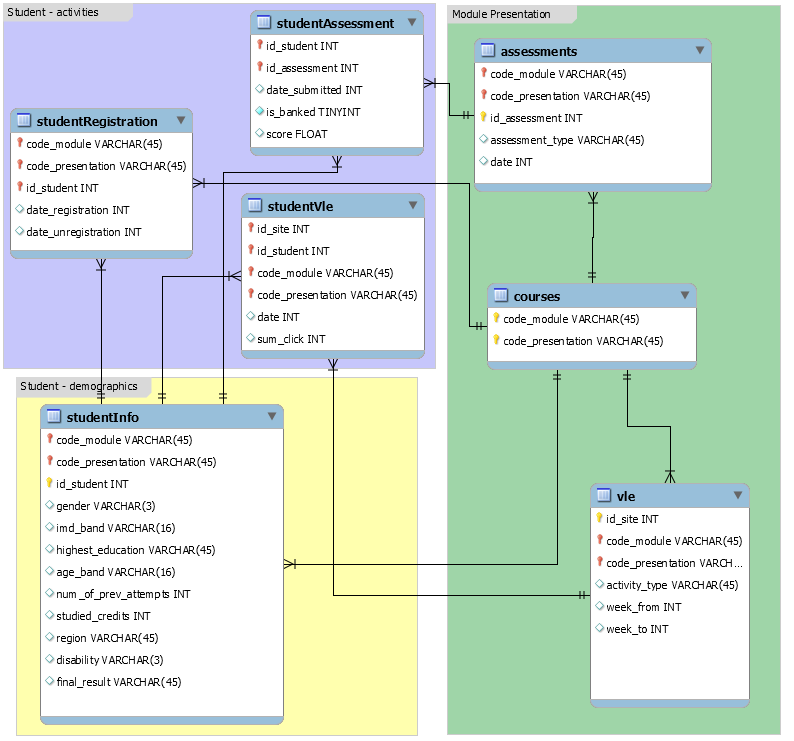

# EDA Level 0 Functions
That section is about introducing Basic information about data tables

In [ ]:
def DataShape(dataframe):
    return {'Rows': [dataframe.shape[0]], 'Columns': [dataframe.shape[1]]}

In [ ]:
def DistinctValue(dataframe):
    features = []
    distinct_counts = []
    distinct_values = []

    for col in dataframe.columns:
        if dataframe[col].dtypes == 'object':
            features.append(col)
            distinct_counts.append(dataframe[col].nunique())
            distinct_values.append(list(dataframe[col].unique()))

    DistinctValue = pd.DataFrame({
                            'Features': features,
                            'Distinct Value Count': distinct_counts,
                            'Distinct Values': distinct_values
                            })

    return DistinctValue

In [ ]:
def MissingValues(dataframe):
    features = []
    data_types = []
    null_counts = []
    null_percentages = []

    for col in dataframe.columns:
        features.append(col)
        data_types.append(dataframe[col].dtypes)
        null_counts.append(dataframe[col].isnull().sum())
        null_percentages.append(dataframe[col].isnull().sum() / dataframe.shape[0] * 100)

    MissingValues = pd.DataFrame({
        'Features': features,
        'Data Type': data_types,
        'Missing Values': null_counts,
        'Percentage Missing Values': null_percentages
                                 })

    return MissingValues

In [ ]:
import pandas as pd

def Duplicates(dataframe, drop=False):
    duplicates = dataframe[dataframe.duplicated()]

    if not duplicates.empty:
        print(f"Found {duplicates.shape[0]} duplicate rows.")
    else:
        print("No duplicate rows found.")

    if drop:
        data = dataframe.drop_duplicates()
        return duplicates, data
    else:
        return duplicates


# EDA Level 0

In [ ]:
for table_name,data in University_Learning_Analytics_datasetData.items():
  print(f"Table: {table_name}")
  display(data.info())
  print()
  display(data.head(5))
  print()
print('='*100)

for table_name,data in University_Learning_Analytics_datasetData.items():
  print(f"Table: {table_name}")
  display(DataShape(data))
  print()
  display(DistinctValue(data))
  print()
  display(MissingValues(data))
  print()
  display(Duplicates(data, drop=False))
  file_name = f"{table_name}_cleaned.csv"
  data.to_csv(file_name, index=False)

# EDA Level 0 Functions
That section is about proccessing the data to make it be explored next

In [ ]:
def DataTypeConvert(data):
    for col in data.columns:
        col_type = data[col].dtype

# Case 1 : Downcast integers and floats to the smallest possible type
        if pd.api.types.is_numeric_dtype(col_type):
            if pd.api.types.is_integer_dtype(col_type):
                data[col] = pd.to_numeric(data[col], downcast='integer')
            elif pd.api.types.is_float_dtype(col_type):
                data[col] = pd.to_numeric(data[col], downcast='float')

# Case 2 : Convert to category if the number of unique values is relatively low
        elif col_type == 'object':
            num_unique_values = data[col].nunique()
            num_total_values = len(data[col])
            if num_unique_values / num_total_values < 0.5:
                data[col] = data[col].astype('category')
    return data


In [ ]:
def FillMissingValues(data, numeric_strategy='mean', categorical_strategy='mode'):
    for col in data.columns:

# Case 1 : Fill missing values in numeric columns
        if pd.api.types.is_numeric_dtype(data[col]):
            if numeric_strategy == 'mean':
                data[col].fillna(data[col].mean(), inplace=True)
            elif numeric_strategy == 'median':
                data[col].fillna(data[col].median(), inplace=True)

# Case 2 : Fill missing values in categorical columns
        elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':
            if categorical_strategy == 'mode':
                data[col].fillna(data[col].mode()[0], inplace=True)

  return data


# EDA Level 0